<h1>Three analyses that examine:</h1>
<ol style="font-size: 2em;">
    <li>Whether theoretically weaker teams more frequently take long-distance shots.</li>
    <li>Whether the shot maps differ in women's and men's football.</li>
    <li>Whether not winning teams more frequently decide to take long-distance shots in the final stages of matches.</li>
</ol>


In [6]:
from mplsoccer import Sbopen
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np

In [7]:
# Creates a dictionary of shots from competitions

competition_list = [[1267, 107, 'Africa 23'], [43, 106, 'WC 2022'], [43, 3, 'WC 2018'],
                    [55, 43, 'Euro 2020'], [72, 107, 'WC-F 2023'], [72, 30, 'WC-F 2019'], 
                    [9, 27, 'Bundes 15/16'], [1238, 108, 'Indain 21/22'], [11, 27, 'La liga 15/16'],
                   [7, 27, 'Ligue 1 15/16'], [2, 27, 'PL 15/16'], [12, 27, 'Seria A 15/16'],
                   [37, 90, 'Super 20/21'], [37, 42, 'Super 19/20'], [37, 4, 'Super 18/19']]

parser = Sbopen()

shots_dict = {}

for competition in competition_list:

    competition_id = competition[0]
    season_id = competition[1]
    competition_name = competition[2]
    
    df_match = parser.match(competition_id, season_id)
    
    list_match_id = []
    
    for _, match in df_match.iterrows():
        list_match_id.append((match.match_id, match.home_team_name, match.away_team_name))

    counter = 0
    
    for match in list_match_id:

        match_id, home_team, away_team = match
        
        df_event = parser.event(match_id)[0]
        shot_rows = df_event[df_event['type_name'] == "Shot"]
        
        for _, shot in shot_rows.iterrows():
                
                counter += 1

                if shot.minute <= 96:
                    
                    shots_dict[f'{competition_name}{counter}'] = {
                                            'x': shot.x, 'y': shot.y, 'result': shot.outcome_name, 'min': shot.minute + 1, 'team_name': shot.team_name,
                                                'home_team': home_team, 'away_team': away_team, 'free kick': shot.play_pattern_name}

<h2>1. Whether theoretically weaker teams more frequently take long-distance shots:</h2>
<h3 style = "color:gray;">Teams are divided into better and worse.</h3>
<h3 style = "color:gray;">Quantities and percentages for shots, shots on target, and goals are checked.</h3>

In [8]:
# Creates a list of better and worse teams, splits the league in half based on points, and divides tournaments into the best of 16

def teams(competition_id, season_id, competition_name):
    
    df_match = parser.match(competition_id, season_id)
    list_top_teams = []
    team_points = {}

    # Creates league table
    if '/' in competition_name:
        
        for _, match in df_match.iterrows():
            
            home_team = match.home_team_name
            away_team = match.away_team_name
            home_score = match.home_score
            away_score = match.away_score
            
            if home_team not in team_points:
                
                team_points[home_team] = 0
                
            if away_team not in team_points:
                
                team_points[away_team] = 0
            
            if home_score > away_score:
                
                team_points[home_team] += 3
                
            elif home_score < away_score:
                
                team_points[away_team] += 3
                
            else:
                
                team_points[home_team] += 1
                team_points[away_team] += 1
                
        team_points = dict(sorted(team_points.items(), key = lambda item: item[1], reverse = True))
        sorted_teams = list(team_points.keys())
        
        list_top_teams = sorted_teams[:len(sorted_teams) // 2]
        
    else:
        
        for _, match in df_match.iterrows():
            
            if match.competition_stage_name == 'Round of 16':
                
                list_top_teams.append(match.home_team_name)
                list_top_teams.append(match.away_team_name)
            
    return list_top_teams

In [9]:
def statistical_shots(shots_dict, list_top_teams, shot_types = [], better_list = [], worse_list = []):

    # Calculates the number and percentage of specific shots
    
    grouptop_counts = 0
    grouptop_counts_all = 0
    groupbottom_counts = 0
    groupbottom_counts_all = 0
    
    for _, shot_info in shots_dict.items():

        # Penalties are not taken
        if shot.x != 108.0 and shot.y != 40.0 and shot.x != 108.1 and shot.y != 40.1:
        
            if shot_info['team_name'] in list_top_teams:
                
                grouptop_counts_all += 1
                
                if shot_info['result'] not in shot_types:
                    
                    # if long-distance shot
                    if shot_info['x'] < 102 or shot_info['y'] < 18 or shot_info['y'] > 62:
                        
                        grouptop_counts += 1
            else:
                
                groupbottom_counts_all += 1
                
                if shot_info['result'] not in shot_types:
                    
                    if shot_info['x'] < 102 or shot_info['y'] < 18 or shot_info['y'] > 62:
                        
                        groupbottom_counts += 1
                    
    better_list.append(round(grouptop_counts / grouptop_counts_all * 100, 2))
    worse_list.append(round(groupbottom_counts / groupbottom_counts_all * 100, 2))

    return better_list, worse_list

In [10]:
def make_dictionary(shots_dict, competition_name):
    
    new_dictionary = {}
    
    for key, value in shots_dict.items():
        
        if key.startswith(competition_name):
            
            new_dictionary[key] = value

        else:

            if new_dictionary != {}:

                break

    return new_dictionary

In [11]:
for competition in competition_list:

    better_list = []
    worse_list = []
    
    competition_id = competition[0]
    season_id = competition[1]
    competition_name = competition[2]

    # Creates a list of better and worse teams, splits the league in half based on points, and divides tournaments into the best of 16
    list_top_teams = teams(competition_id, season_id, competition_name)

    new_dictionary = make_dictionary(shots_dict, competition_name)
    
    better_list, worse_list = statistical_shots(new_dictionary, list_top_teams)
    
    better_list, worse_list = statistical_shots(
    shots_dict = new_dictionary,
    list_top_teams = list_top_teams,
    shot_types = ['Blocked', 'Saved Off Target', 'Off T', 'Wayward', 'Post'],
    better_list = better_list,
    worse_list = worse_list
)
    
    better_list, worse_list = statistical_shots(
    shots_dict = new_dictionary,
    list_top_teams = list_top_teams,
    shot_types = ['Blocked', 'Saved Off Target', 'Off T', 'Wayward', 'Post', 'Saved', 'Saved to Post'],
    better_list = better_list,
    worse_list = worse_list
)

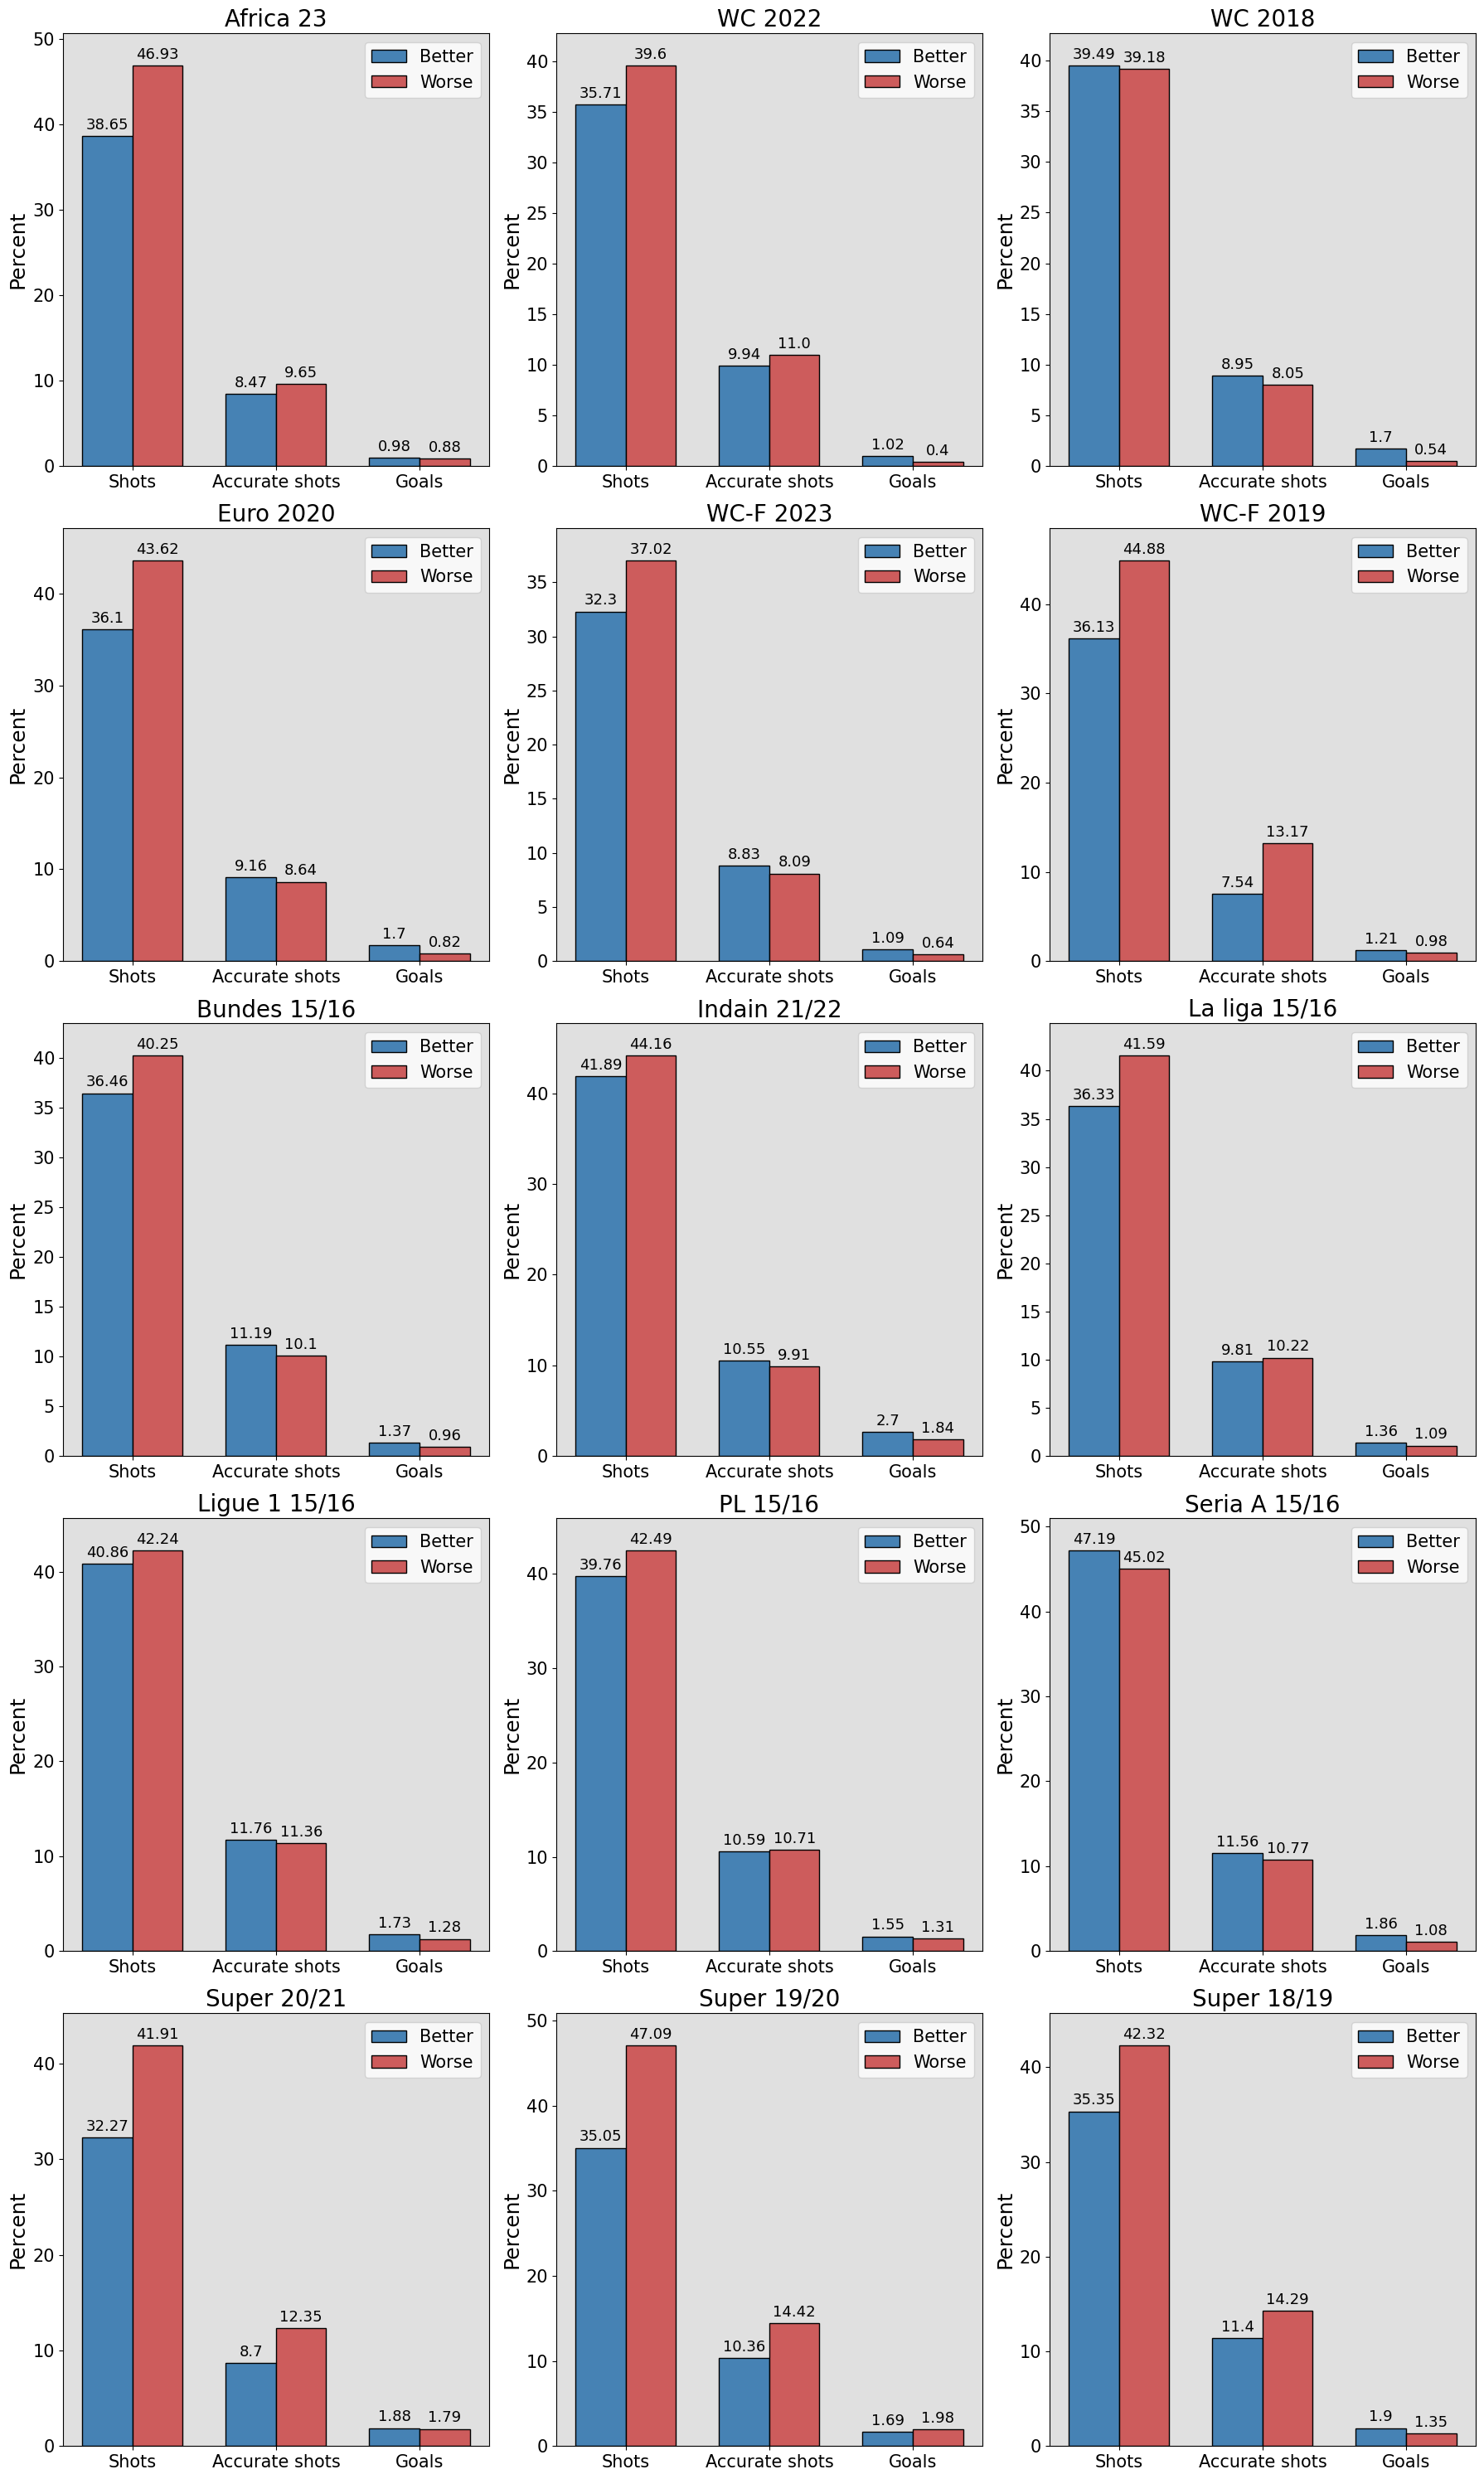

In [12]:
# Displays percentage relationships on a chart

competition_names = [competition_name[-1] for competition_name in competition_list]

indexes_shots = [i for i in range(0, len(better_list), 3)]
indexes_accurate_shots = [i for i in range(1, len(better_list), 3)]
indexes_goals = [i for i in range(2, len(better_list), 3)]

fig, axes = plt.subplots(5, 3, figsize = (18, 30))
axes = axes.flatten()

for i, ax in enumerate(axes):
    
    competition = competition_names[i]
    
    data_better = [better_list[indexes_shots[i]], better_list[indexes_accurate_shots[i]], better_list[indexes_goals[i]]]
    data_worse = [worse_list[indexes_shots[i]], worse_list[indexes_accurate_shots[i]], worse_list[indexes_goals[i]]]
    
    bar_width = 0.35
    index = np.arange(len(data_better))
    
    bars1 = ax.bar(index, data_better, bar_width, label = 'Better', color = 'steelblue', edgecolor = 'black')
    bars2 = ax.bar(index + bar_width, data_worse, bar_width, label = 'Worse', color = 'indianred', edgecolor = 'black')

    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height}',
        xy = (bar.get_x() + bar.get_width() / 2, height),
        xytext = (0, 3),
        textcoords = "offset points",
        ha = 'center', va = 'bottom', fontsize = 13, color = 'black')
        
    ax.set_facecolor('#e0e0e0')
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
    ax.set_ylabel('Percent', fontsize = 18)
    ax.set_title(competition, fontsize = 20)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(['Shots', 'Accurate shots', 'Goals'])
    ax.legend(fontsize = 15)
    ax.set_ylim(0, max(data_better + data_worse) * 1.08)

plt.tight_layout()
plt.show()

<h2>Conclusion:</h2>

<h3 style = "color:gray;">Weaker teams more frequently take shots on goal from long distance.</h3>
<h3 style = "color:gray;">Better teams more frequently score goals from long-distance shots.</h3>

<h2>2. Whether the shot maps differ in women's and men's football</h2>
<h3 style = "color:gray;">A chart resembling a soccer field.</h3>
<h3 style = "color:gray;">It shows where shots from long distance were taken from.</h3>
<h3 style = "color:gray;">Both from open play and from a free kick.</h3>

In [13]:
def analysis(analysis_name):
    
    data_for_competitions = []

    competitions = ['WC 2022', 'Euro 2020', 'WC-F 2023', 'WC-F 2019', 'Bundes 15/16', 'La liga 15/16', 'Super 20/21', 'Super 19/20']
    
    for competition_name in competitions:
        
        x_values = []
        y_values = []
        colors = []
        shapes = []
        edge_colors = []
    
        new_dictionary = make_dictionary(shots_dict, competition_name)

        if analysis_name == 'free kick':
    
            new_dictionary = {k: v for k, v in new_dictionary.items() if v['free kick'] == 'From Free Kick'}
    
        for shot in new_dictionary.values():
        
            x = shot['x']
            y = shot['y']
            result = shot['result']
    
            # if long-distance shot
            if x < 102 or y < 18 or y > 62:
                
                x_values.append(x)
                y_values.append(y)
                
                if result == 'Goal':
                    
                    colors.append('limegreen')
                    shapes.append('^')
                    edge_colors.append('black')
                    
                elif result in ('Saved', 'Saved Off Target'):
                    
                    colors.append('yellow')
                    shapes.append('^')
                    edge_colors.append('none')
                    
                else:
                    
                    colors.append('red')
                    shapes.append('o')
                    edge_colors.append('none')
                    
        data_for_competitions.append((x_values, y_values, colors, shapes, edge_colors, competition_name))
    
    fig, axs = plt.subplots(4, 2, figsize = (12, 28))
    
    for i, ax in enumerate(axs.flat):
            
            x_values, y_values, colors, shapes, edge_colors, competition_name = data_for_competitions[i]
            
            for x, y, color, shape, edge_color in zip(x_values, y_values, colors, shapes, edge_colors):
                
                ax.scatter(x, y, c = color, marker = shape, edgecolors = edge_color)
    
            # Creates a chart similar to a soccer field
            legend_elements = [
                Line2D([0], [0], marker = 'o', color = 'w', label = 'Missed Shot', markerfacecolor = 'red', markersize = 10),
                Line2D([0], [0], marker = '^', color = 'w', label = 'Accurate Shot', markerfacecolor = 'yellow', markersize = 10),
                Line2D([0], [0], marker = '^', color = 'w', label = 'Goal', markerfacecolor = 'limegreen', markeredgecolor = 'black', markersize = 10)
            ]
            
            ax.legend(handles = legend_elements, loc = 'upper left')
            ax.set_xlim(59, 120)
            ax.set_ylim(0, 80)
            
            rect1 = patches.Rectangle((102, 18), 18, 44, linewidth = 4, edgecolor = 'black', facecolor = 'none')
            rect2 = patches.Rectangle((114, 30), 6, 20, linewidth = 4, edgecolor = 'black', facecolor = 'none')
            circle = patches.Circle((60, 40), radius = 10, linewidth = 4, edgecolor = 'black', facecolor = 'none')
            
            ax.add_patch(circle)
            ax.add_patch(rect1)
            ax.add_patch(rect2)
            
            ax.axvline(x = 60, color = 'black', linestyle = '-', linewidth = 4)
            ax.set_facecolor('#e0e0e0')
            
            ax.set_title(f'Shots from {analysis_name} {competition_name}', fontsize = 13)
            
            
    plt.tight_layout()
    plt.show()

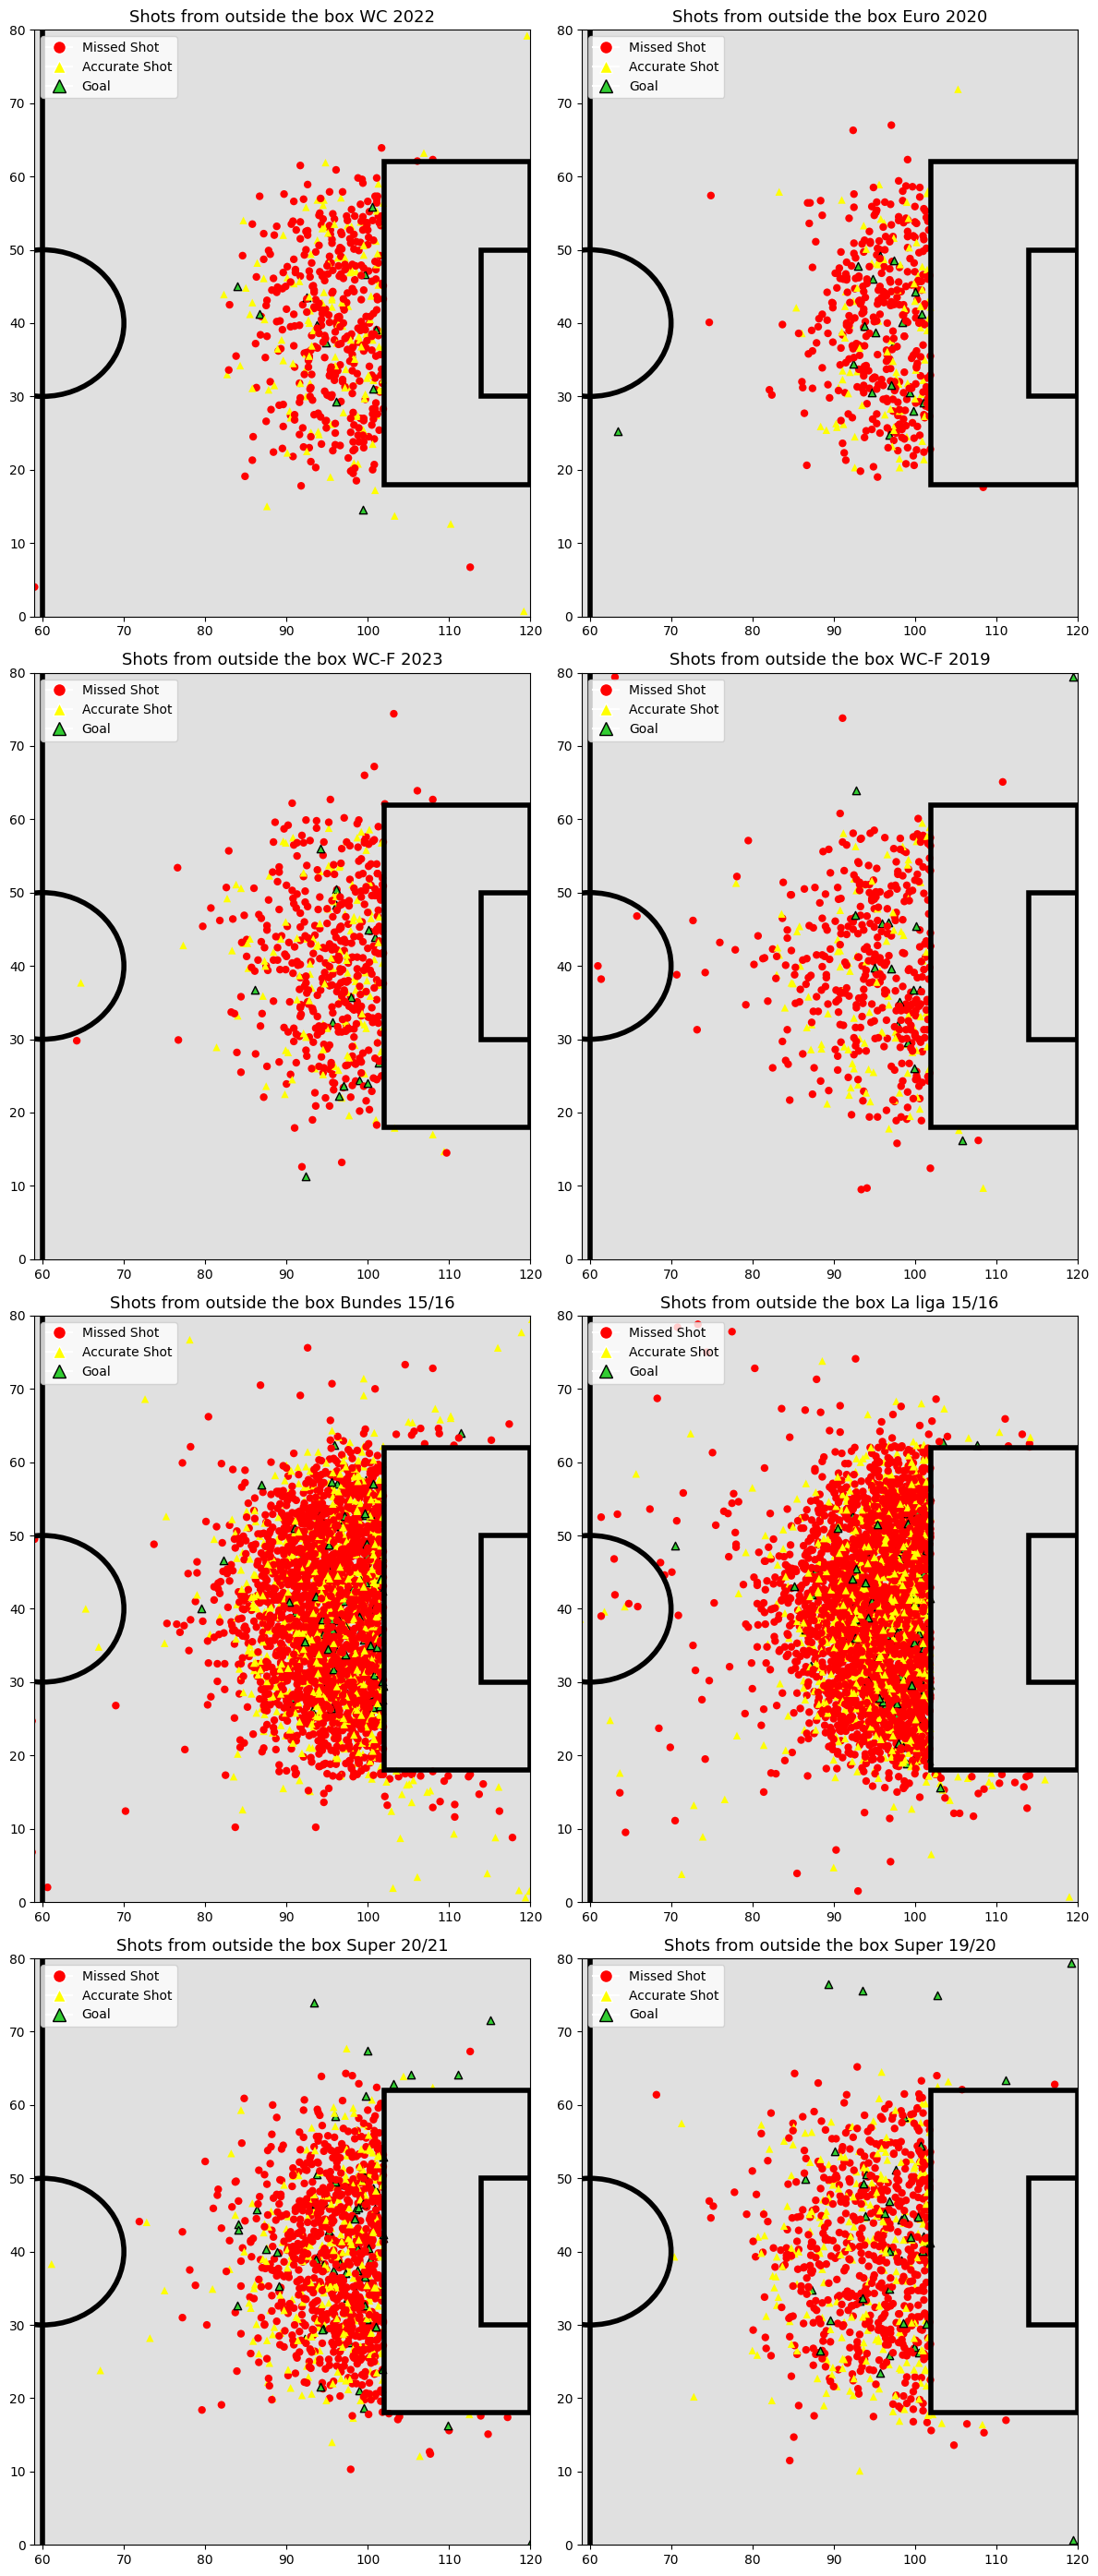

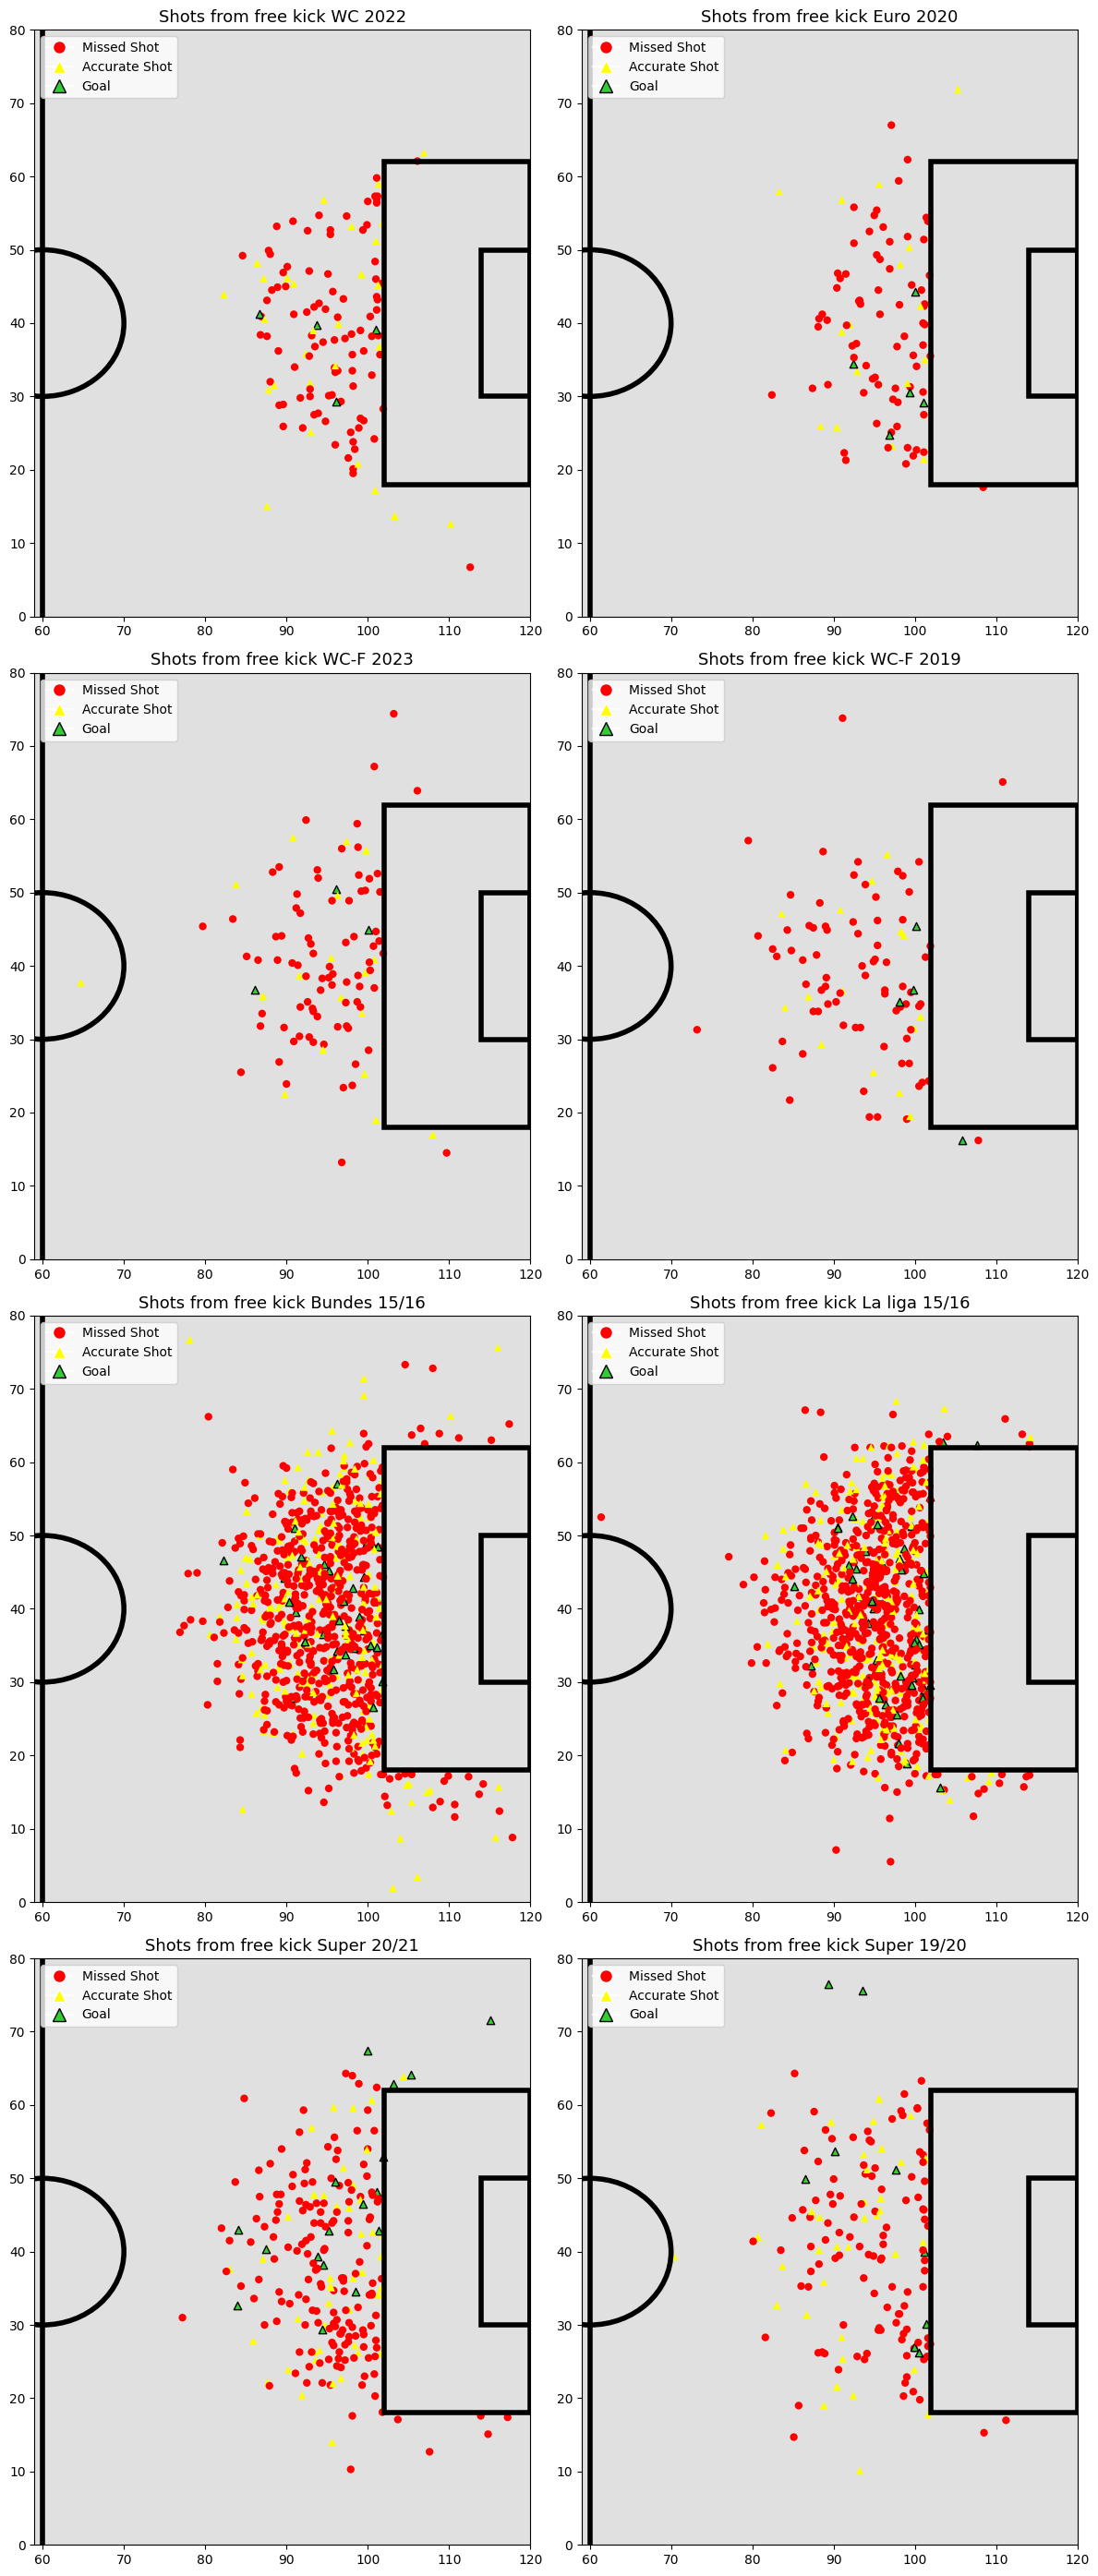

In [14]:
analysis('outside the box')
analysis('free kick')

<h2>Conclusion:</h2>
<h3 style = "color:gray;">Women more frequently score goals from the side sectors of the field. Both from open play and from a free kick.</h3>

<h2>Drawbacks:</h2>

<h3 style = "color:gray;">With too much data, the chart becomes unreadable.</h3>
<h3 style = "color:gray;">There is too little data to draw confident conclusions.</h3>

<h2>3. Whether not winning teams more frequently decide to take long-distance shots in the final stages of matches</h2>
<h3 style = "color:gray;">Only shots taken in the last fifteen minutes of the game by the losing team are taken into account.</h3>

In [15]:
def team_isnt_winning(new_dictionary, minute, team_name, home_team, away_team):

    # returns True if team isnt winning
    
    home_team_score = 0
    away_team_score = 0
    team_name_is_home_name = False
    
    for _, shot_info in new_dictionary.items():

            if home_team == shot_info['home_team'] and away_team == shot_info['away_team']:

                team_name = shot_info['team_name']
    
                if shot_info['min'] <= minute and shot_info['result'] == 'Goal':    
                           
                    if team_name == shot_info['home_team']:
        
                        team_name_is_home_name = True
                        home_team_score += 1
                        
                    else:
                        
                        away_team_score += 1

    return (home_team_score <= away_team_score) if team_name_is_home_name else (home_team_score >= away_team_score)

In [16]:
shots_after_15 = []
counter_all = 0
counter_15 = 0

for competition in competition_list:

    competition_name = competition[2]

    new_dictionary = make_dictionary(shots_dict, competition_name)
    
    for _, shot_info in new_dictionary.items():
                
        # if long-distance shot
        if shot_info['x'] < 102 or shot_info['y'] < 18 or shot_info['y'] > 62:
            
            counter_all += 1

            if shot_info['min'] >= 75:
                
                if team_isnt_winning(new_dictionary, shot_info['min'], shot_info['team_name'], shot_info['home_team'], shot_info['away_team']):
                    counter_15 += 1

    
    shots_after_15.append((competition_name, round(counter_15 / counter_all * 100, 2)))  

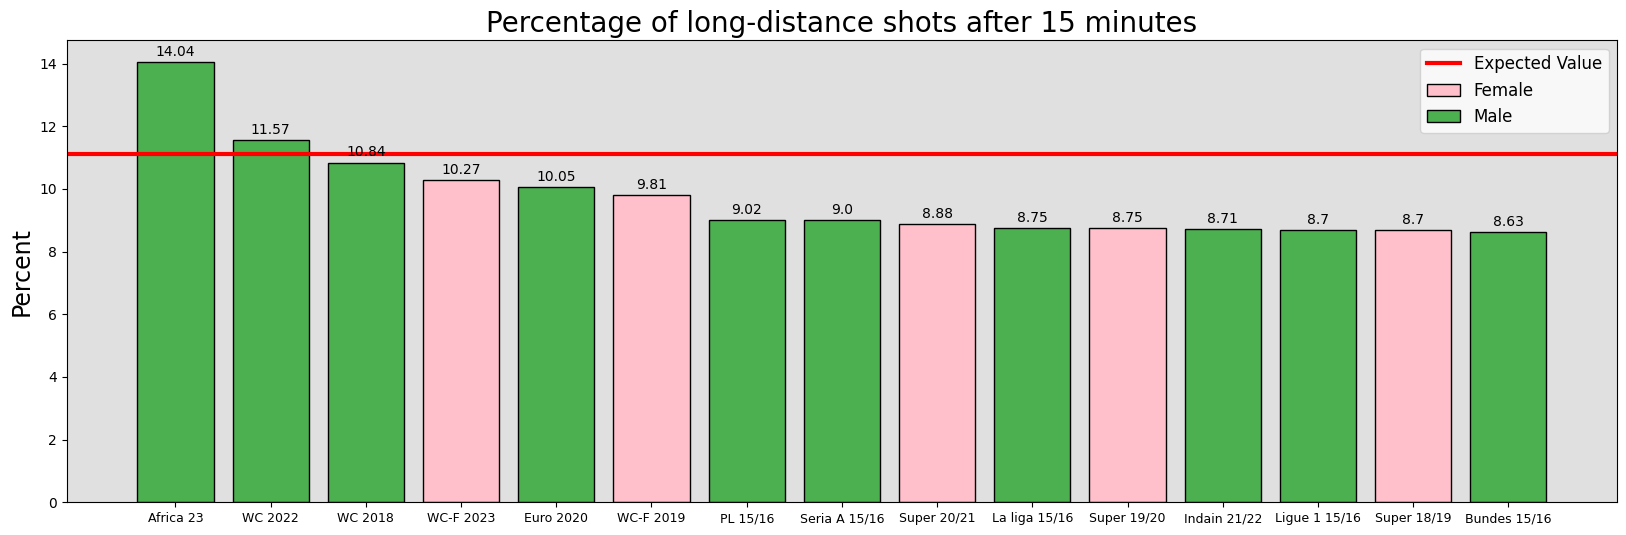

In [17]:
# Shows on the chart what percentage of shots are taken in the last quarter by the losing team

shots_after_15 = sorted(shots_after_15, key = lambda x: x[1], reverse = True)

names = [item[0] for item in shots_after_15]
values = [item[1] for item in shots_after_15]

fig, ax = plt.subplots(figsize = (20, 6))
bars = ax.bar(names, values, color = ['pink' if name.startswith('Super') or '-F' in name else '#4CAF50' for name in names], edgecolor = 'black')

ax.set_facecolor('#e0e0e0')
plt.tick_params(axis = 'x', labelsize = 9)
plt.title('Percentage of long-distance shots after 15 minutes', fontsize = 20)
plt.ylabel('Percent', fontsize = 17)

# Expected value - hard to predict, for now its 1/6 * 2/3 (15min its 1/6 time of the game, 2/3 because not losing team is approximately 2 times rarer)
expected_line = plt.axhline(y = 100/9, color = 'red', linestyle = '-', linewidth = 3)


for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha = 'center', va = 'bottom')

legend_elements = [Line2D([0], [0], color = 'red', linestyle = '-', linewidth = 3, label = 'Expected Value'),
                    Patch(facecolor = 'pink', edgecolor = 'black', label = 'Female'),
                   Patch(facecolor = '#4CAF50', edgecolor = 'black', label = 'Male')
                   ]

legend_elements = [art for art in legend_elements if not art.get_label().startswith('_')]

ax.legend(handles = legend_elements, loc = 'upper right', fontsize = 12)

plt.show()

<h2>Conclusion:</h2>
<h3 style = "color:gray;">Teams that are not winning take fewer shots in the last quarter than expected.</h3>

<h2>Drawbacks:</h2>
<h3 style = "color:gray;">It is really difficult to predict how many shots should be taken by such a team in the last quarter of the game.</h3>